In [1]:
from keras.models import load_model
import numpy as np
import os
from keras.preprocessing import image
from keras.utils.np_utils import to_categorical
from keras.models import *
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array
from google.colab.patches import cv2_imshow

In [2]:
img = cv2.imread('/content/drive/MyDrive/Đồ án ML/File datasets/Emotion Testing image/IMG_1.jpg')

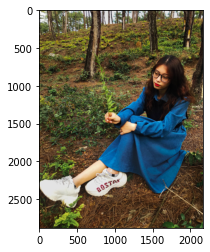

In [3]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

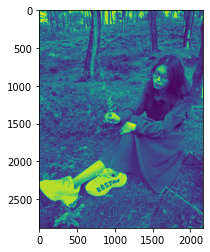

In [4]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)

In [5]:
model = load_model('/content/drive/MyDrive/Đồ án ML/File datasets/model.h5')

In [6]:
model.load_weights('/content/drive/MyDrive/Đồ án ML/File datasets/model_emotion.h5')

In [7]:
cd '/content/drive/MyDrive/Đồ án ML/File colab/Dũng'

/content/drive/MyDrive/Đồ án ML/File colab/Dũng


In [8]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
faces = faceCascade.detectMultiScale(gray_img,1.1,4)
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0))
  roi_gray = gray_img[y:y+w,x:x+h]
  roi_gray=cv2.resize(roi_gray,(48,48))
  image_pixels = img_to_array(roi_gray)
  image_pixels = np.expand_dims(image_pixels,axis =0)
  image_pixels /= 255
  predictions = model.predict(image_pixels)
  max_index = np.argmax(predictions[0])
  emotion_detection = ('angry','disgust','fear','happy','sad','surprise','neutral')
  emotion_prediction = emotion_detection[max_index]
  print(emotion_prediction)
  font = cv2.FONT_HERSHEY_SIMPLEX
  org = (50,50)
  fontScale=1
  color = (255,0,0)
  thickness = 2
  image = cv2.putText(img,emotion_prediction,org,font,fontScale,color,thickness,cv2.LINE_AA)
  cv2_imshow(image)